<a href="https://colab.research.google.com/github/R-it-a/Estrutura-de-dados/blob/main/tcc3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
!pip install swifter
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import pandas as pd

educacao_2020 = pd.read_csv(
   '/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv',
    error_bad_lines=False,
    sep = ";",
    encoding = 'ISO-8859-1',
   usecols=["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "TP_SEXO", "TP_COR_RACA", "Q001", "Q002",]
)

# Transforma a variável TP_SEXO em binária
#educacao_2020 = pd.get_dummies(educacao_2020, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2020['TP_COR_RACA'] = educacao_2020['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Remove as linhas com valores faltantes
educacao_2020 = educacao_2020.dropna()
educacao_2020 = shuffle(educacao_2020, random_state=1).sample(frac=0.1, random_state=1)


# Carrega o dataframe de 2011
educacao_2011 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2011.csv', sep=';', encoding='ISO-8859-1', usecols=['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO', 'TP_COR_RACA', 'Q002', 'Q003'])

# Transforma a variável TP_SEXO em binária
#educacao_2011 = pd.get_dummies(educacao_2011, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2011['TP_COR_RACA'] = educacao_2011['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})



# Remove as linhas com valores faltantes
educacao_2011 = educacao_2011.dropna()
educacao_2011 = shuffle(educacao_2011, random_state=1).sample(frac=0.1, random_state=1)

# Carrega o dataframe de 2018
educacao_2018 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2018.csv', sep=';', encoding='ISO-8859-1', usecols=['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO', 'TP_COR_RACA', 'Q001', 'Q002'])

# Transforma a variável TP_SEXO em binária
#educacao_2018 = pd.get_dummies(educacao_2018, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2018['TP_COR_RACA'] = educacao_2018['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Remove as linhas com valores faltantes
educacao_2018 = educacao_2018.dropna()

educacao_2018 = shuffle(educacao_2018, random_state=1).sample(frac=0.1, random_state=1)



Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.2 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=27fa201defcb4d684ee3394f56280d635dc32e377083e9f6de32eab859b11b11
  Stored in directory: /root/.cache/pip/wheels/2b/5e/f2/3931524f702ffd03309e96d35ee2fbf9c61c27377511ee8d4c
Successfully built swifter


<ipython-input-1-8ac6ccee918b>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  educacao_2020 = pd.read_csv(


In [ ]:
educacao_2018.head


<bound method NDFrame.head of         TP_SEXO    TP_COR_RACA  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  \
0             F        amarelo       534.2       611.4       517.9   
1             F        amarelo       506.9       477.8       495.3   
2             M  nao_declarado       470.6       473.8       534.4   
3             F          pardo       588.9       663.3       614.5   
4             F       indigena       477.8       621.5       519.4   
...         ...            ...         ...         ...         ...   
5513727       F         branco       474.9       603.3       467.1   
5513728       F          preto       489.3       602.3       515.1   
5513730       M  nao_declarado       425.8       496.9       393.3   
5513731       F          pardo       462.8       561.9       521.5   
5513732       M         branco       486.2       619.9       467.8   

         NU_NOTA_MT Q001 Q002  
0             496.3    E    E  
1             440.6    D    E  
2             410.4    B    B  
3

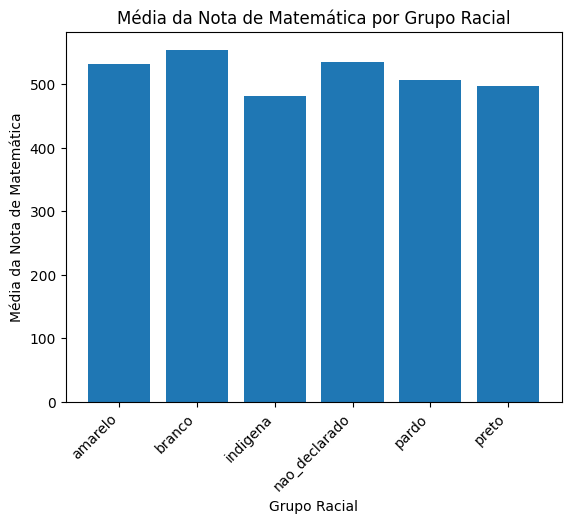

In [ ]:
import matplotlib.pyplot as plt

# Agrupar os dados por ano e raça e calcular a média das notas de matemática
grouped = educacao.groupby(['TP_COR_RACA']).agg({'NU_NOTA_MT': 'mean'}).reset_index()

# Criar o gráfico de barras com as médias
plt.bar(grouped['TP_COR_RACA'], grouped['NU_NOTA_MT'])
plt.xlabel('Grupo Racial')
plt.ylabel('Média da Nota de Matemática')
plt.title('Média da Nota de Matemática por Grupo Racial')

plt.xticks(rotation=45, ha='right')

plt.show()


In [ ]:
desvio_padrao = educacao.groupby('TP_COR_RACA')['NU_NOTA_MT'].std()
print(desvio_padrao)

TP_COR_RACA
amarelo          119.436275
branco           118.871701
indigena          92.851527
nao_declarado    122.002767
pardo            103.123310
preto             97.385839
Name: NU_NOTA_MT, dtype: float64


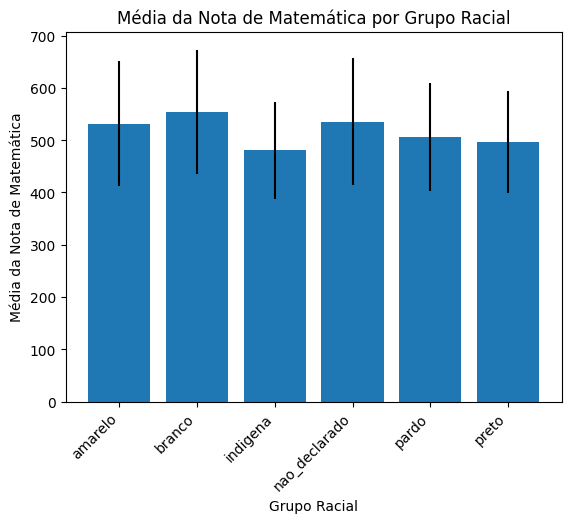

In [ ]:
# Agrupar os dados por ano e raça e calcular a média e desvio padrão das notas de matemática
grouped = educacao.groupby(['TP_COR_RACA']).agg({'NU_NOTA_MT': ['mean', 'std']}).reset_index()

# Renomear as colunas
grouped.columns = ['TP_COR_RACA', 'MEDIA_NOTA_MT', 'DESVIO_PADRAO_NOTA_MT']

# Criar o gráfico de barras com as médias e desvios padrão
plt.bar(grouped['TP_COR_RACA'], grouped['MEDIA_NOTA_MT'], yerr=grouped['DESVIO_PADRAO_NOTA_MT'])
plt.xlabel('Grupo Racial')
plt.ylabel('Média da Nota de Matemática')
plt.title('Média da Nota de Matemática por Grupo Racial')

# Definir rotação da legenda do eixo x
plt.xticks(rotation=45, ha='right')

plt.show()


In [ ]:
educacao.head

<bound method NDFrame.head of         TP_SEXO    TP_COR_RACA  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  \
5             F          pardo       498.1       604.7       505.4   
8             F          pardo       439.7       383.5       486.2   
11            M         branco       491.1       631.4       627.9   
18            F          pardo       422.4       488.1       559.1   
19            M          preto       486.0       503.3       439.8   
...         ...            ...         ...         ...         ...   
5513727       F         branco       474.9       603.3       467.1   
5513728       F          preto       489.3       602.3       515.1   
5513730       M  nao_declarado       425.8       496.9       393.3   
5513731       F          pardo       462.8       561.9       521.5   
5513732       M         branco       486.2       619.9       467.8   

         NU_NOTA_MT Q001 Q002 Q003  
5             526.7    C    B  NaN  
8             448.5    B    C  NaN  
11            546.

Text(0, 0.5, 'Nota Média de Matemática')

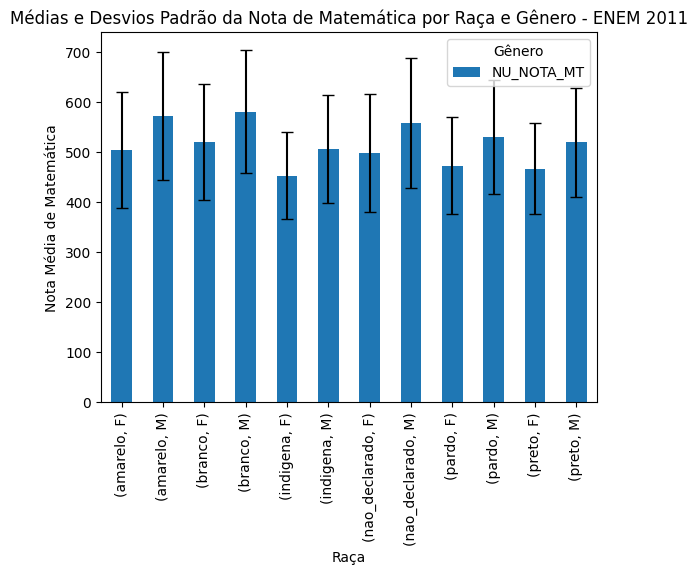

In [ ]:
import matplotlib.pyplot as plt

# Agrupa os dados por raça e gênero
grouped = educacao_2011.groupby(['TP_COR_RACA', 'TP_SEXO'])

# Calcula as médias e desvios padrão para cada grupo
means = grouped['NU_NOTA_MT'].mean()
stds = grouped['NU_NOTA_MT'].std()

# Plota o gráfico de barras com as médias e desvios padrão
means.plot(kind='bar', yerr=stds, capsize=4, title='Médias e Desvios Padrão da Nota de Matemática por Raça e Gênero - ENEM 2011')

# Adiciona legendas e rótulos aos eixos
plt.legend(title='Gênero')
plt.xlabel('Raça')
plt.ylabel('Nota Média de Matemática')


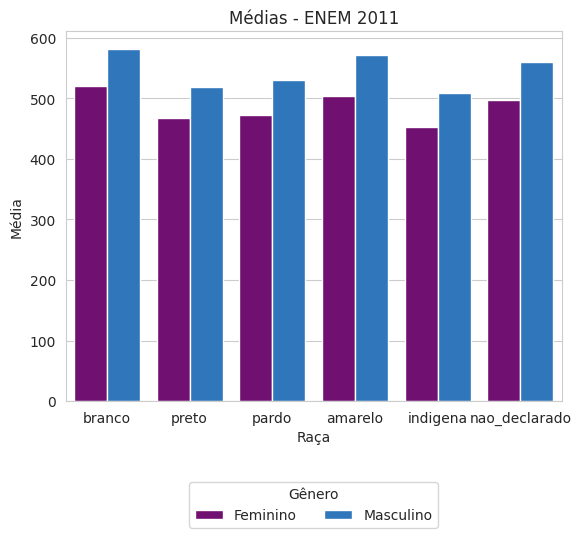

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define o estilo do gráfico
sns.set_style("whitegrid")

# Calcula as médias e desvios padrão por raça e gênero
data = educacao_2011.groupby(['TP_COR_RACA', 'TP_SEXO']).agg({'NU_NOTA_MT': ['mean', 'std']}).reset_index()

# Renomeia as colunas
data.columns = ['TP_COR_RACA', 'TP_SEXO', 'media', 'desvio_padrao']

# Define a ordem das raças
order = ['branco', 'preto', 'pardo', 'amarelo', 'indigena', 'nao_declarado']

# Define as cores
colors = {'F': '#800080', 'M': '#1976D2'}

# Plota o gráfico
ax = sns.barplot(x='TP_COR_RACA', y='media', hue='TP_SEXO', data=data, order=order, palette=colors)

# Adiciona a legenda de cor abaixo do gráfico
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Feminino', 'Masculino'], title='Gênero', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Define o título e os eixos
ax.set_title('Médias - ENEM 2011')
ax.set_xlabel('Raça')
ax.set_ylabel('Média')

# Exibe o gráfico
plt.show()


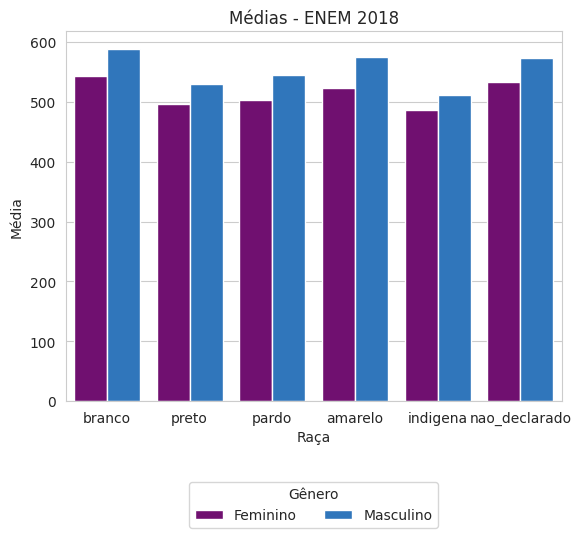

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define o estilo do gráfico
sns.set_style("whitegrid")

# Calcula as médias e desvios padrão por raça e gênero
data = educacao_2018.groupby(['TP_COR_RACA', 'TP_SEXO']).agg({'NU_NOTA_MT': ['mean', 'std']}).reset_index()

# Renomeia as colunas
data.columns = ['TP_COR_RACA', 'TP_SEXO', 'media', 'desvio_padrao']

# Define a ordem das raças
order = ['branco', 'preto', 'pardo', 'amarelo', 'indigena', 'nao_declarado']

# Define as cores
colors = {'F': '#800080', 'M': '#1976D2'}

# Plota o gráfico
ax = sns.barplot(x='TP_COR_RACA', y='media', hue='TP_SEXO', data=data, order=order, palette=colors)

# Adiciona a legenda de cor abaixo do gráfico
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Feminino', 'Masculino'], title='Gênero', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Define o título e os eixos
ax.set_title('Médias - ENEM 2018')
ax.set_xlabel('Raça')
ax.set_ylabel('Média')

# Exibe o gráfico
plt.show()


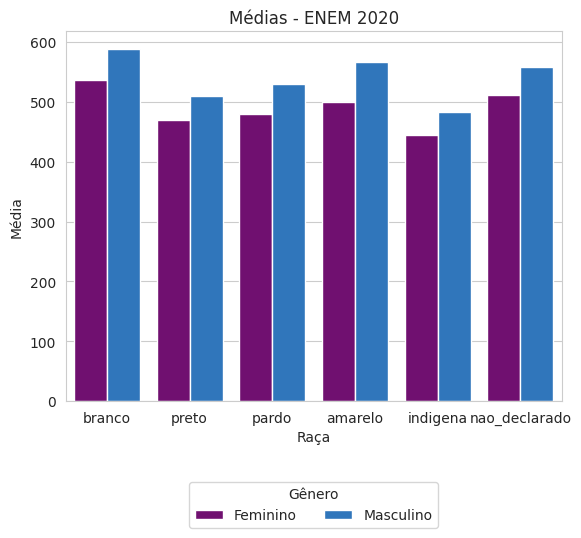

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define o estilo do gráfico
sns.set_style("whitegrid")

# Calcula as médias e desvios padrão por raça e gênero
data = educacao_2020.groupby(['TP_COR_RACA', 'TP_SEXO']).agg({'NU_NOTA_MT': ['mean', 'std']}).reset_index()

# Renomeia as colunas
data.columns = ['TP_COR_RACA', 'TP_SEXO', 'media', 'desvio_padrao']

# Define a ordem das raças
order = ['branco', 'preto', 'pardo', 'amarelo', 'indigena', 'nao_declarado']

# Define as cores
colors = {'F': '#800080', 'M': '#1976D2'}

# Plota o gráfico
ax = sns.barplot(x='TP_COR_RACA', y='media', hue='TP_SEXO', data=data, order=order, palette=colors)

# Adiciona a legenda de cor abaixo do gráfico
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Feminino', 'Masculino'], title='Gênero', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Define o título e os eixos
ax.set_title('Médias - ENEM 2020')
ax.set_xlabel('Raça')
ax.set_ylabel('Média')

# Exibe o gráfico
plt.show()


In [ ]:
X = educacao_2020[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO', 'TP_COR_RACA']]
y = educacao_2020['NU_NOTA_MT']


In [ ]:
X = pd.get_dummies(X, columns=['TP_SEXO', 'TP_COR_RACA'])


In [ ]:
X = pd.concat([X, educacao_2011[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO', 'TP_COR_RACA']]], axis=0)
X = pd.concat([X, educacao_2018[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO', 'TP_COR_RACA']]], axis=0)

y = pd.concat([y, educacao_2011['NU_NOTA_MT']], axis=0)
y = pd.concat([y, educacao_2018['NU_NOTA_MT']], axis=0)


In [ ]:
X, y = shuffle(X, y, random_state=42)


In [ ]:
model = LinearRegression()

model.fit(X, y)


ValueError: ignored

In [ ]:

# Define as variáveis preditoras (X) e a variável de resposta (y)
X = educacao_2020[['idade', 'qtd_pessoas_fam', 'qtd_comodos', 'renda_familiar']]
y = educacao_2020['nota_matematica']

# Divide o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria e ajusta o modelo de regressão linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Realiza as previsões no conjunto de teste
y_pred = regressor.predict(X_test)

# Calcula o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print('Erro médio quadrático:', mse)


KeyError: ignored